# **Comparativa y Selección de modelos de clasificación: SVM, Random Forest y Árbol de Decisión aplicados al dataset Fashion-MNIST**

A continuación  se presenta el análisis comparativo entre tres modelos de clasificación supervisados Random Forest (Bosque Aleatorio), SVM (Support Vector Machine) y Árbol de Decisión (Decision Tree) aplicados sobre el dataset de Fashion-MNIST. Se evalúan métricas de rendimiento, costo computacional, interpretabilidad y adecuación práctica, con el fin de determinar el modelo más conveniente.

 Antes de empezar, realizaremos una breve descripción del dominio del dataset implementado, correspondiente al Fashion-MNIST (en el este link se puede hallar mayor detalle: https://www.kaggle.com/datasets/zalando-research/fashionmnist).


**Contexto**

 Fashion-MNIST es un conjunto de datos creado por Zalando, compuesto por 60 000 imágenes de entrenamiento y 10 000 de prueba, cada una en escala de grises de 28×28 píxeles. Representa 10 clases de prendas de vestir y fue diseñado como un reemplazo directo del dataset MNIST de dígitos escritos a mano, manteniendo el mismo formato y estructura. Su objetivo es evaluar y comparar algoritmos de aprendizaje automático bajo condiciones más realistas. A diferencia del MNIST original (centrado en números manuscritos), Fashion-MNIST introduce mayor complejidad visual y desafío de clasificación.


**Contenido**

Cada imagen tiene 28 píxeles de alto y 28 de ancho, para un total de 784 píxeles. Cada píxel tiene un solo valor de píxel asociado, lo que indica la claridad u oscuridad de ese píxel; los números más altos significan más oscuro. Este valor de píxel es un número entero entre 0 y 255. Los conjuntos de datos de entrenamiento y prueba tienen 785 columnas.

La primera columna consta de las etiquetas de clase y representa la prenda de vestir. El resto de las columnas contienen los valores de píxeles de la imagen asociada. Cada fila es una imagen separada con sus 784 píxeles.

**Etiquetas**

Cada ejemplo de entrenamiento y prueba se asigna a una de las siguientes etiquetas:

* 0 camiseta / top
* 1 pantalón
* 2 suéter
* 3 vestido
* 4 abrigo
* 5 sandalia
* 6 camiseta
* 7 zapatilla
* 8 bolsa
* 9 bota de tobillo

A continuación, **Oscar Mauricio Parra Folleco, Jaime Alberto Sierra Sierra y Juan Miguel Velandia Garcia** integrantes del **grupo 3** de la asignatura de Aprendizaje Automático en la Maestría de Inteligencia Atificial desarrollarán, el análisis exploratorio de datos, la justificación del preprocesamiento, la implementación detallada de los modelos, la comparación de rendimiento y las conclusiones técnicas.






# **Importe de las librerias necesarias**
Se incluye además de las librerias pandas, numpy y matplotlib, la de keras con el ánimo de poder cargar y consumir el conjunto de datos MNIST.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras as kr

# **Lectura del Dataset (Datos Recolectados Fashion-MNIST)**
Descarga y carga del conjunto de datos Fashion MNIST

In [6]:
(X_train, y_train), (X_test, y_test) = kr.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **Análisis Exploratorio y Pre-Procesamiento de datos  de Datos (EDA)**

Inspección previa del conjunto de datos antes de su preparación y entrenamiento

Preparación de los datos para mostrar una imagen de ejemplo por cada tipo de prenda del conjunto de datos.

Análisis de la importancia de las variables (píxeles) en el modelo Random Forest.

Se confirmaron datos completos, sin nulos, duplicados

Se verificó el balance de clases (~6 000 imágenes por categoría).

Se visualizaron ejemplos aleatorios para validar el dominio visual.

Se analizó la distribución de intensidades de píxeles (0–255).

Se normalizó el dataset y se cofirmó una correcta estandarización, codificación

Se generan visualizaciones de relaciones con la matriz de correlación y un boxplots

In [7]:
# Assuming X_train is the numpy array containing the training data
# Convert the numpy array to a pandas DataFrame
df_train_pd = pd.DataFrame(X_train.reshape(X_train.shape[0], -1))

# Create column names for pixels
pixel_cols = [f'pixel{i+1}' for i in range(df_train_pd.shape[1])]

# Assign column names to the DataFrame
df_train_pd.columns = pixel_cols

# Insert the label column (assuming y_train contains the labels)
df_train_pd.insert(0, 'label', y_train)

display(df_train_pd.head())

#Para este dataset solo se observan variables numericas y solo una categórica, la cual ya se encuentra codificada para cada una de las 10 clases (entre 0 y 9)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_unique = df_train_pd.drop_duplicates("label", keep="first").sort_values("label")
X_u = df_unique.iloc[:,1:].values
y_u = df_unique.iloc[:,0].values

In [9]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [10]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [11]:
y_u

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
y_u

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

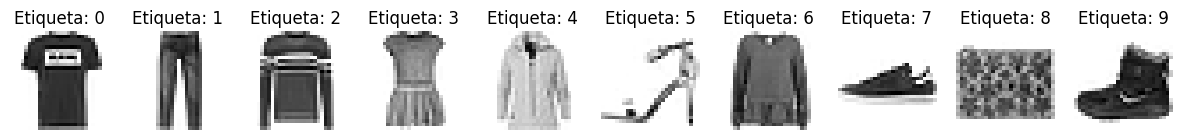

In [13]:
import matplotlib.pyplot as plt

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 15))
for ax, image, label in zip(axes, X_u, y_u):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Etiqueta: %i' % label)

In [14]:
import numpy as np
import pandas as pd
import keras as kr

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = kr.datasets.fashion_mnist.load_data()


# Verificar valores nulos en el conjunto de entrenamiento
print("Valores nulos en X_train:", np.isnan(X_train).sum())
print("Valores nulos en y_train:", np.isnan(y_train).sum())

# Verificar duplicados (considerando las imágenes aplanadas)
print("Número de filas duplicadas en X_train:", pd.DataFrame(X_train.reshape(X_train.shape[0], -1)).duplicated().sum())

#Inspección del rango de pixeles despues de la carga con Keras
print("\nVerificando el rango de valores de los píxeles en X_train después de cargar con Keras (rango 0-255):")
print(f"Mínimo valor de píxel en X_train: {X_train.min()}")
print(f"Máximo valor de píxel en X_train: {X_train.max()}")

# --- Normalización de Píxeles a 0-1 ---
# Pixeles normalizados entre 0-1
X_train_normalized = X_train / 255
X_test_normalized = X_test / 255

print("\nRango de valores de píxeles después de la normalización (rango 0-1):")
print(f"Mínimo valor de píxel en X_train_normalized: {X_train_normalized.min()}")
print(f"Máximo valor de píxel en X_train_normalized: {X_train_normalized.max()}")
print(f"Mínimo valor de píxel en X_test_normalized: {X_test_normalized.min()}")
print(f"Máximo valor de píxel en X_test_normalized: {X_test_normalized.max()}")


#Inspección del tipo de datos y del rango de valores de los pixeles en el conjunto de entrenamiento
print("\nData type of X_train:", X_train.dtype)
print("Min pixel value in X_train:", X_train.min())
print("Max pixel value in X_train:", X_train.max())

#Inspección del tipo de datos y del rango de valores de los pixeles en el conjunto de prueba
print("Data type of X_test:", X_test.dtype)
print("Min pixel value in X_test:", X_test.min())
print("Max pixel value in X_test:", X_test.max())

# Inspección de balance de las clases
print("\nDistribución de clases en y_train:")
unique_classes, class_counts = np.unique(y_train, return_counts=True)
for cls, count in zip(unique_classes, class_counts):
    print(f"Clase {cls}: {count} ejemplos")

# Confirmación de la salud del dataset mediente media y desviación estandar.
print("\nConfirmando la media y desviación estándar de los datos de entrenamiento normalizados:")
mean_train = np.mean(X_train_normalized)
std_train = np.std(X_train_normalized)
print(f"Media de X_train_normalized: {mean_train}")
print(f"Desviación estándar de X_train_normalized: {std_train}")

Valores nulos en X_train: 0
Valores nulos en y_train: 0
Número de filas duplicadas en X_train: 0

Verificando el rango de valores de los píxeles en X_train después de cargar con Keras (rango 0-255):
Mínimo valor de píxel en X_train: 0
Máximo valor de píxel en X_train: 255

Rango de valores de píxeles después de la normalización (rango 0-1):
Mínimo valor de píxel en X_train_normalized: 0.0
Máximo valor de píxel en X_train_normalized: 1.0
Mínimo valor de píxel en X_test_normalized: 0.0
Máximo valor de píxel en X_test_normalized: 1.0

Data type of X_train: uint8
Min pixel value in X_train: 0
Max pixel value in X_train: 255
Data type of X_test: uint8
Min pixel value in X_test: 0
Max pixel value in X_test: 255

Distribución de clases en y_train:
Clase 0: 6000 ejemplos
Clase 1: 6000 ejemplos
Clase 2: 6000 ejemplos
Clase 3: 6000 ejemplos
Clase 4: 6000 ejemplos
Clase 5: 6000 ejemplos
Clase 6: 6000 ejemplos
Clase 7: 6000 ejemplos
Clase 8: 6000 ejemplos
Clase 9: 6000 ejemplos

Confirmando la med

--- Análisis Descriptivo de las Etiquetas de Clase ---

Conteo de ejemplos por clase:


,count
0,6000
1,6000
2,6000
3,6000
4,6000
5,6000
6,6000
7,6000
8,6000
9,6000


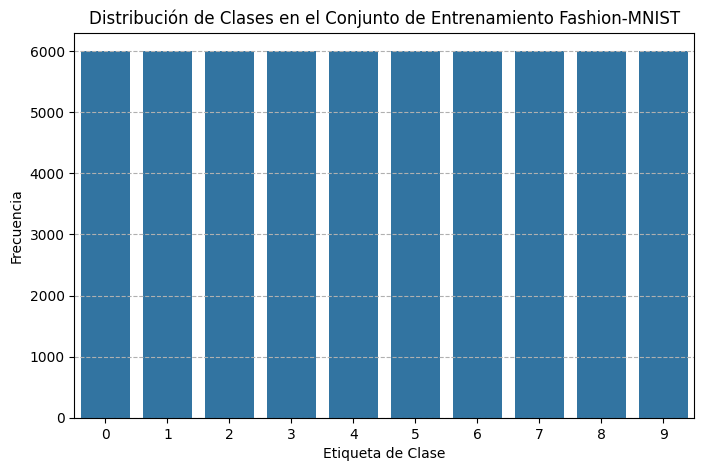


--- Análisis Descriptivo de los Valores de Píxeles ---

Estadísticas descriptivas para los valores de píxeles (mostrando un subconjunto para brevedad):


,0,1,2,3,4,5,6,7,8,9
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.000800,0.005783,0.030083,0.103800,0.249683,0.414717,0.821667,2.224733,5.698667,14.434650
std,0.092554,0.249033,0.767868,2.512017,4.331376,5.827394,8.309935,14.201820,23.835980,38.204702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16.000000,36.000000,119.000000,164.000000,224.000000,230.000000,221.000000,221.000000,254.000000,255.000000



Estadísticas descriptivas para las etiquetas de clase:


,0
count,60000.000000
mean,4.500000
std,2.872305
min,0.000000
25%,2.000000
50%,4.500000
75%,7.000000
max,9.000000


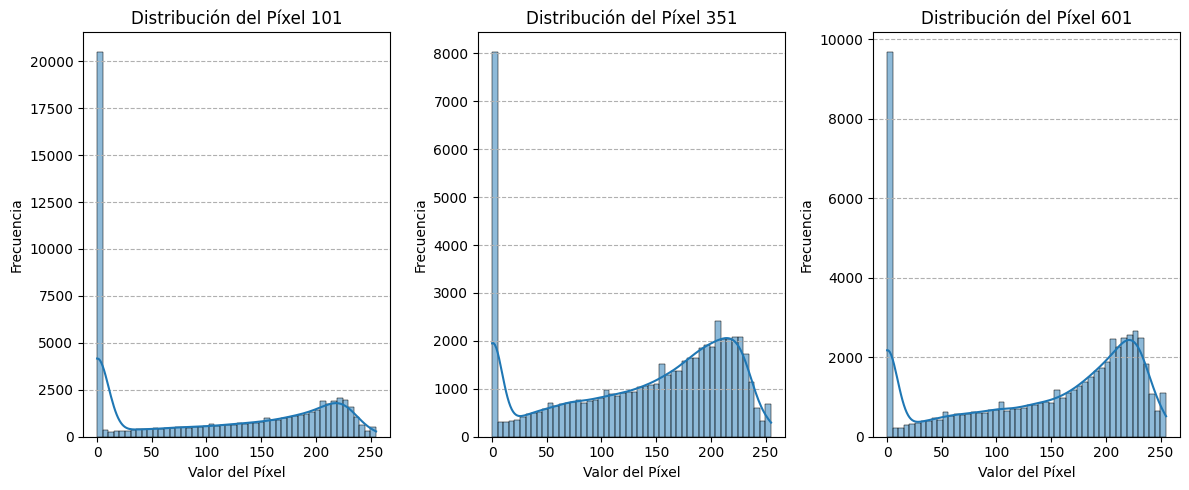

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Importar seaborn para gráficos mejorados

# Asegúrate de que y_train y X_train estén cargados ejecutando las celdas anteriores.
# y_train contiene las etiquetas de clase
# X_train contiene los datos de las imágenes (píxeles)

# --- Análisis Descriptivo de las Etiquetas de Clase (Distribución) ---
print("--- Análisis Descriptivo de las Etiquetas de Clase ---")
# Contar la frecuencia de cada clase en el conjunto de entrenamiento
class_counts = pd.Series(y_train).value_counts().sort_index()

# Mostrar la tabla de frecuencias
print("\nConteo de ejemplos por clase:")
display(class_counts)

# Visualizar la distribución de clases con un histograma
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train) # Usar countplot de seaborn para visualizar la distribución de clases
plt.title('Distribución de Clases en el Conjunto de Entrenamiento Fashion-MNIST') # Título del histograma
plt.xlabel('Etiqueta de Clase') # Etiqueta del eje X
plt.ylabel('Frecuencia') # Etiqueta del eje Y
plt.xticks(range(10), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']) # Asegurar que las etiquetas del eje X sean correctas
plt.grid(axis='y', linestyle='--') # Añadir una cuadrícula en el eje Y
plt.show() # Mostrar el histograma

# --- Análisis Descriptivo de los Valores de Píxeles ---
print("\n--- Análisis Descriptivo de los Valores de Píxeles ---")
# Aplanar los datos de entrenamiento para calcular estadísticas descriptivas de los píxeles
X_train_flat = X_train.reshape(X_train.shape[0], -1)

# Convertir los datos aplanados a un DataFrame de pandas para usar .describe()
df_pixels = pd.DataFrame(X_train_flat)

# Calcular y mostrar estadísticas descriptivas de los valores de píxeles
# Esto mostrará estadísticas como media, desviación estándar, mínimo, máximo, cuartiles para cada píxel.
# Dado que hay 784 píxeles, esta tabla será muy grande.
print("\nEstadísticas descriptivas para los valores de píxeles (mostrando un subconjunto para brevedad):")
# Mostramos las estadísticas para los primeros 10 píxeles como ejemplo
display(df_pixels.iloc[:, :10].describe())

# También podemos ver las estadísticas descriptivas para las etiquetas de clase
print("\nEstadísticas descriptivas para las etiquetas de clase:")
display(pd.Series(y_train).describe())

# Visualizar la distribución general de los valores de píxeles con un histograma
# Seleccionar un subconjunto de píxeles para visualizar sus distribuciones (por ejemplo, algunos píxeles representativos)
# Puedes ajustar esta lista para visualizar la distribución de diferentes píxeles.
pixels_to_histogram = [100, 350, 600] # Índices de píxeles para los histogramas

plt.figure(figsize=(12, 5)) # Ajustar el tamaño de la figura

for i, pixel_index in enumerate(pixels_to_histogram):
    plt.subplot(1, len(pixels_to_histogram), i + 1) # Crear subgráficos
    # Crear un histograma para el píxel seleccionado
    sns.histplot(df_pixels[pixel_index], bins=50, kde=True) # Usar histplot de seaborn con KDE
    plt.title(f'Distribución del Píxel {pixel_index+1}') # Título del histograma
    plt.xlabel('Valor del Píxel') # Etiqueta del eje X
    plt.ylabel('Frecuencia') # Etiqueta del eje Y
    plt.grid(axis='y', linestyle='--') # Añadir una cuadrícula

plt.tight_layout() # Ajustar diseño para evitar solapamientos
plt.show() # Mostrar los histogramas

La tabla de estadísticas descriptivas para las etiquetas de clase confirma que la clase 0 (T-shirt/top) está presente en igual proporción que las demás clases y que no existe sesgo de clase, ya que el promedio 4.5 y la desviación típica 2.87 reflejan una distribución equilibrada. Por tanto, no es necesario aplicar técnicas de balanceo (como oversampling o undersampling).


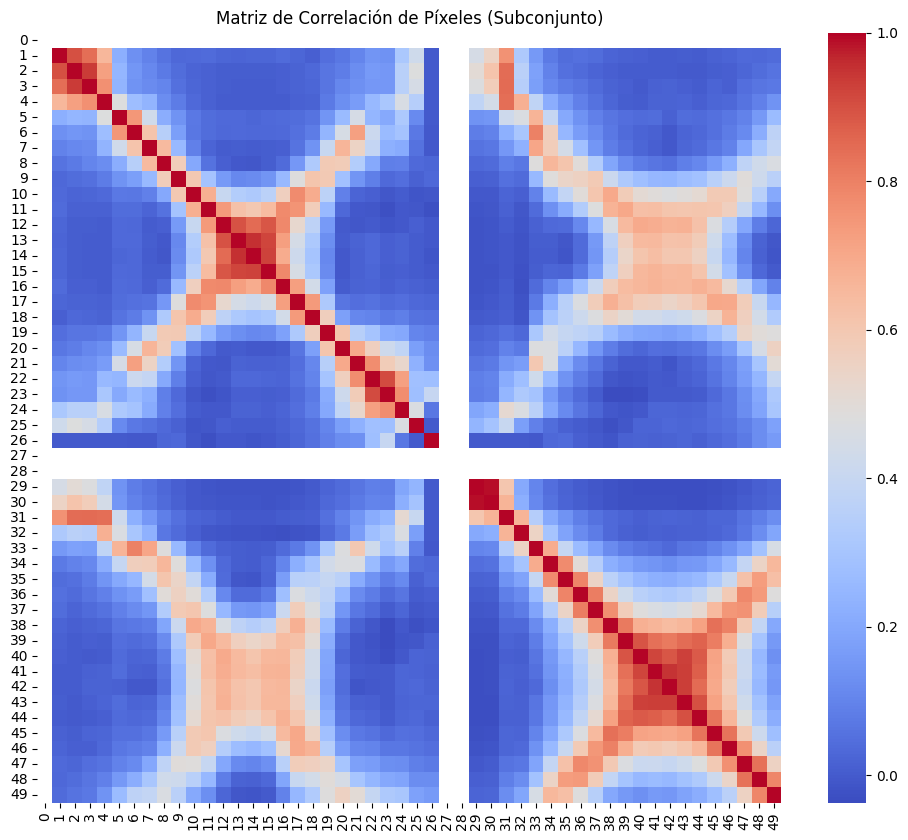

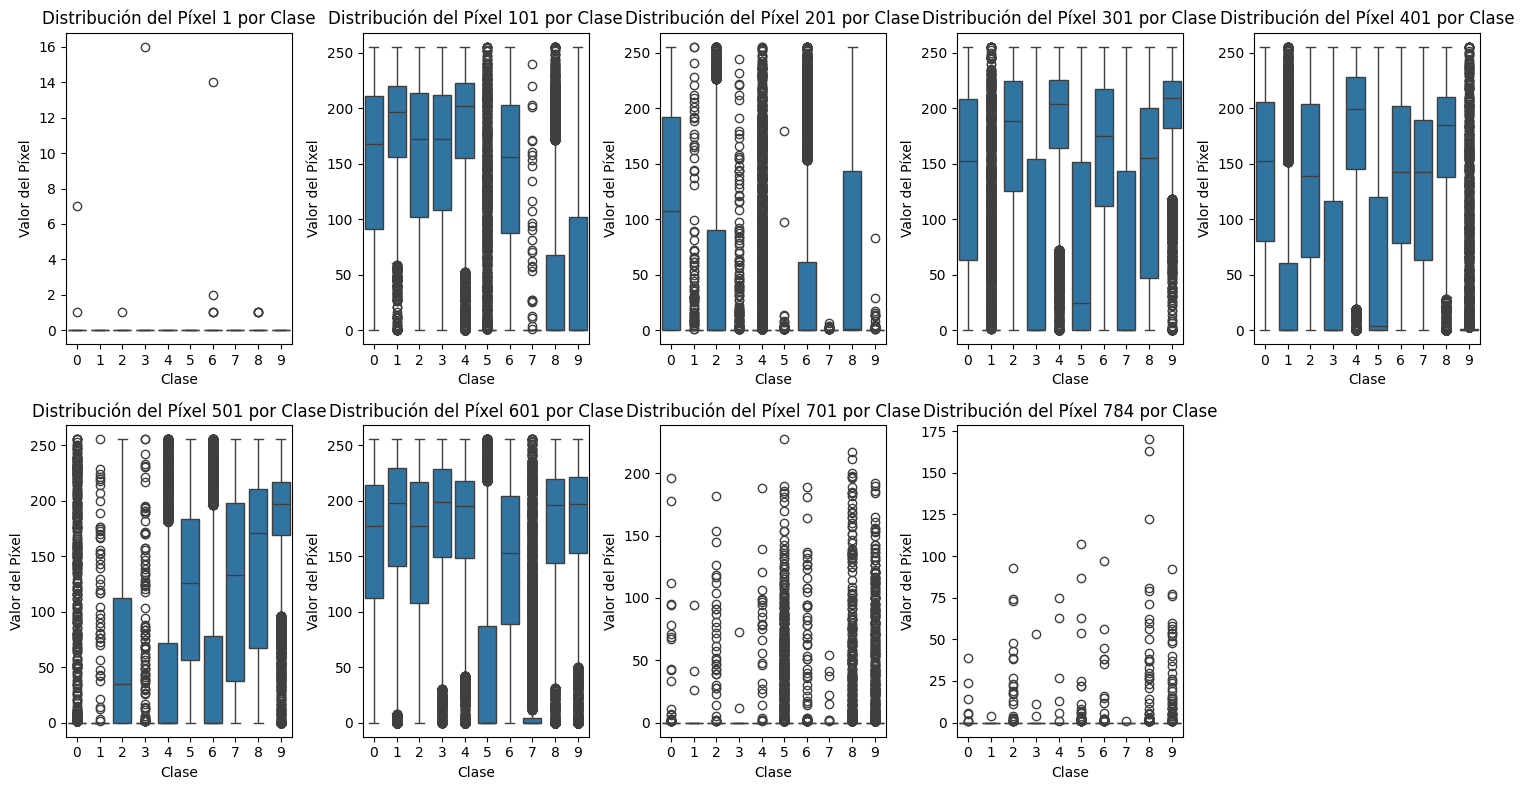

In [15]:
import seaborn as sns # Importar la librería seaborn para visualizaciones estadísticas

# --- Matriz de Correlación ---
# Aplanar los datos de entrenamiento a 2D para el cálculo de la matriz de correlación
X_train_flat = X_train.reshape(X_train.shape[0], -1)

# Crear un DataFrame a partir de los datos de entrenamiento aplanados (opcional, para un manejo más fácil con seaborn)
# Tomando un pequeño subconjunto para fines de demostración debido a la gran cantidad de características (píxeles)
# Una matriz de correlación completa de 784x784 píxeles sería demasiado grande para visualizar de manera efectiva.
subset_size_corr = 1000 # Define el tamaño del subconjunto para la matriz de correlación
X_train_subset_corr = X_train_flat[:subset_size_corr, :] # Selecciona un subconjunto de filas

# Convertir el subconjunto a un DataFrame
df_train_subset_corr = pd.DataFrame(X_train_subset_corr)

# Calcular la matriz de correlación (enfocándose en un pequeño subconjunto de características si es necesario, por ejemplo, los primeros 50 píxeles)
num_features_to_show = 50 # Define cuántas características (píxeles) mostrar en la matriz de correlación
correlation_matrix = df_train_subset_corr.iloc[:, :num_features_to_show].corr() # Calcula la correlación para las primeras 'num_features_to_show' columnas

# Graficar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(12, 10)) # Define el tamaño de la figura
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False) # Crea el mapa de calor. cmap define el esquema de color, annot=False evita mostrar los valores en cada celda.
plt.title('Matriz de Correlación de Píxeles (Subconjunto)') # Establece el título del gráfico
plt.show() # Muestra el gráfico

# Convertir los datos de entrenamiento aplanados completos y las etiquetas en un DataFrame para facilitar el gráfico con seaborn
df_train_full = pd.DataFrame(X_train_flat) # Crea un DataFrame con los datos aplanados
df_train_full['label'] = y_train # Añade la columna de etiquetas

# Seleccionar algunos píxeles para visualizar su distribución a través de diferentes clases usando boxplots
pixels_to_boxplot = [0, 100, 200, 300, 400, 500, 600, 700, 783] # Índices de píxeles para los boxplots (corresponden a las columnas en el DataFrame aplanado)

plt.figure(figsize=(15, 8)) # Define el tamaño de la figura
# Iterar a través de los píxeles seleccionados y crear un boxplot para cada uno
for i, pixel_index in enumerate(pixels_to_boxplot):
    plt.subplot(2, 5, i + 1) # Crea subgráficos en una cuadrícula de 2x5
    # Crea un boxplot mostrando la distribución de los valores del píxel actual ('pixel_index') para cada 'label' (clase)
    sns.boxplot(x='label', y=pixel_index, data=df_train_full)
    plt.title(f'Distribución del Píxel {pixel_index+1} por Clase') # Establece el título del subgráfico (se suma 1 para que coincida con la nomenclatura pixel1, pixel2, etc.)
    plt.xlabel('Clase') # Establece la etiqueta del eje x
    plt.ylabel('Valor del Píxel') # Establece la etiqueta del eje y

plt.tight_layout() # Ajusta automáticamente los parámetros de la subtrama para que los subgráficos encajen en el área de la figura
plt.show() # Muestra el gráfico

# **Selección del Modelo de Random Forest**
Se escogio el modelo de clasificación Random Forest dada su simplicidad, explicabilidad y efectividad que tenemos en el caso de uso. Aquí se importa el modelo y se configuran los hiperparámetros: profundidad, aleatoriedad y procesamiento, para hacer el primer entrenamiento.

Forma del subconjunto de entrenamiento: (48000, 784)
Forma del subconjunto de validación: (12000, 784)
Forma del conjunto de prueba (original): (10000, 784)

Reporte de clasificación para el clasificador Random Forest en el conjunto de validación:
              precision    recall  f1-score   support

           0       0.74      0.79      0.77      1200
           1       0.99      0.86      0.92      1200
           2       0.60      0.71      0.65      1200
           3       0.66      0.90      0.76      1200
           4       0.55      0.72      0.62      1200
           5       0.96      0.85      0.90      1200
           6       0.60      0.12      0.20      1200
           7       0.85      0.90      0.87      1200
           8       0.93      0.93      0.93      1200
           9       0.88      0.93      0.91      1200

    accuracy                           0.77     12000
   macro avg       0.78      0.77      0.75     12000
weighted avg       0.78      0.77      0.75     

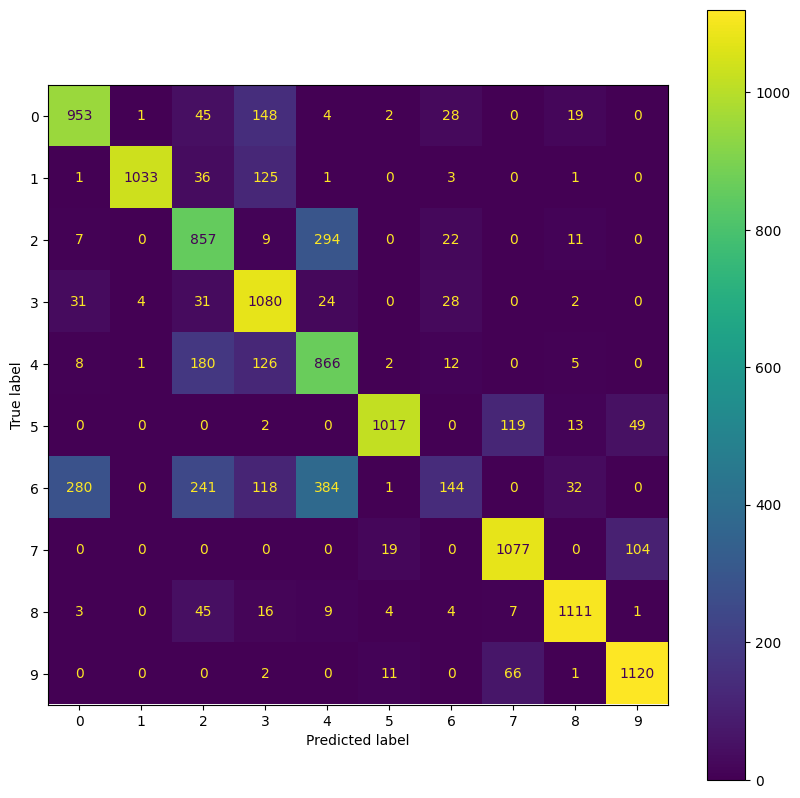

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # Importar la función para dividir los datos
from sklearn import metrics # Importar métricas para evaluación

# Asegúrate de que X_train y y_train estén cargados ejecutando las celdas anteriores.

# Reshape the training and testing data to be 2-dimensional
X_train_flat = X_train.reshape(X_train.shape[0], -1) # Aplanar las imágenes de entrenamiento a un formato 2D
X_test_flat = X_test.reshape(X_test.shape[0], -1)     # Aplanar las imágenes de prueba a un formato 2D

# Dividir el conjunto de entrenamiento original en un subconjunto de entrenamiento (80%) y un conjunto de validación (20%)
# Se utiliza stratify=y_train para asegurar que la distribución de clases sea similar en ambos subconjuntos
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_flat, y_train, test_size=0.2, random_state=0, stratify=y_train
)

# Crear una instancia del modelo Random Forest Classifier
# max_depth: la profundidad máxima del árbol
# random_state: semilla para la reproducibilidad de los resultados
# n_jobs: número de trabajos a ejecutar en paralelo (-1 usa todos los procesadores)
rf_model = RandomForestClassifier(max_depth=5, random_state=0, n_jobs=-1)

# Entrenar el modelo utilizando el subconjunto de entrenamiento
rf_model.fit(X_train_split, y_train_split)

# Imprimir la forma de los subconjuntos para verificar la división
print("Forma del subconjunto de entrenamiento:", X_train_split.shape)
print("Forma del subconjunto de validación:", X_val_split.shape)
# Nota: X_test_flat y y_test son el conjunto de prueba original, no modificado por train_test_split aquí.
print("Forma del conjunto de prueba (original):", X_test_flat.shape)


# Realizar predicciones sobre el conjunto de validación para la evaluación inicial
pred_val = rf_model.predict(X_val_split)

# Imprimir el reporte de clasificación para evaluar el rendimiento en el conjunto de validación
print(f"\nReporte de clasificación para el clasificador Random Forest en el conjunto de validación:\n"
      f"{metrics.classification_report(y_val_split, pred_val)}\n")

# Mostrar la matriz de confusión para el conjunto de validación
print("Matriz de confusión para el clasificador Random Forest en el conjunto de validación:\n")
fig, ax = plt.subplots(figsize=(10, 10)) # Crear figura y ejes para la matriz de confusión
metrics.ConfusionMatrixDisplay.from_estimator(rf_model, X_val_split, y_val_split, cmap=plt.cm.viridis, ax=ax) # Generar y mostrar la matriz de confusión
plt.show() # Mostrar la figura

# **Importancia de las Variables**
Mediante visualización en heatmap y colormap idetificareos la importancia de las variables, cuales pixeles son determinantes en la clasificación de las imágenes.

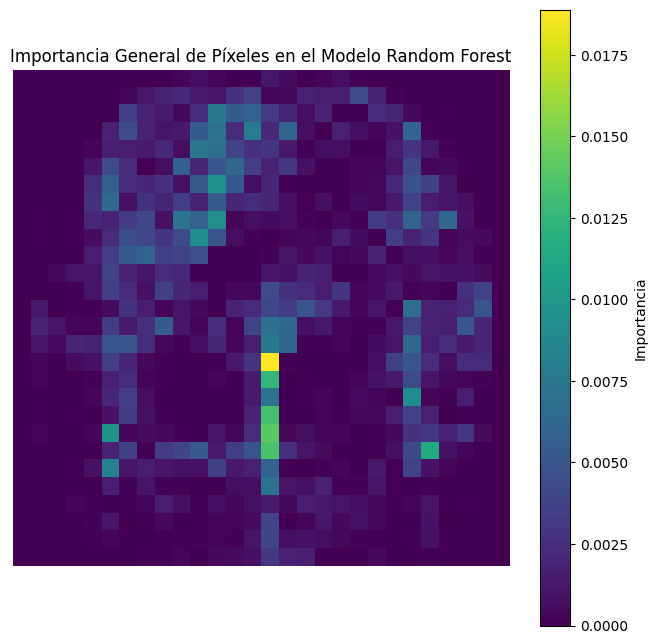


Visualizing average pixel values per class:


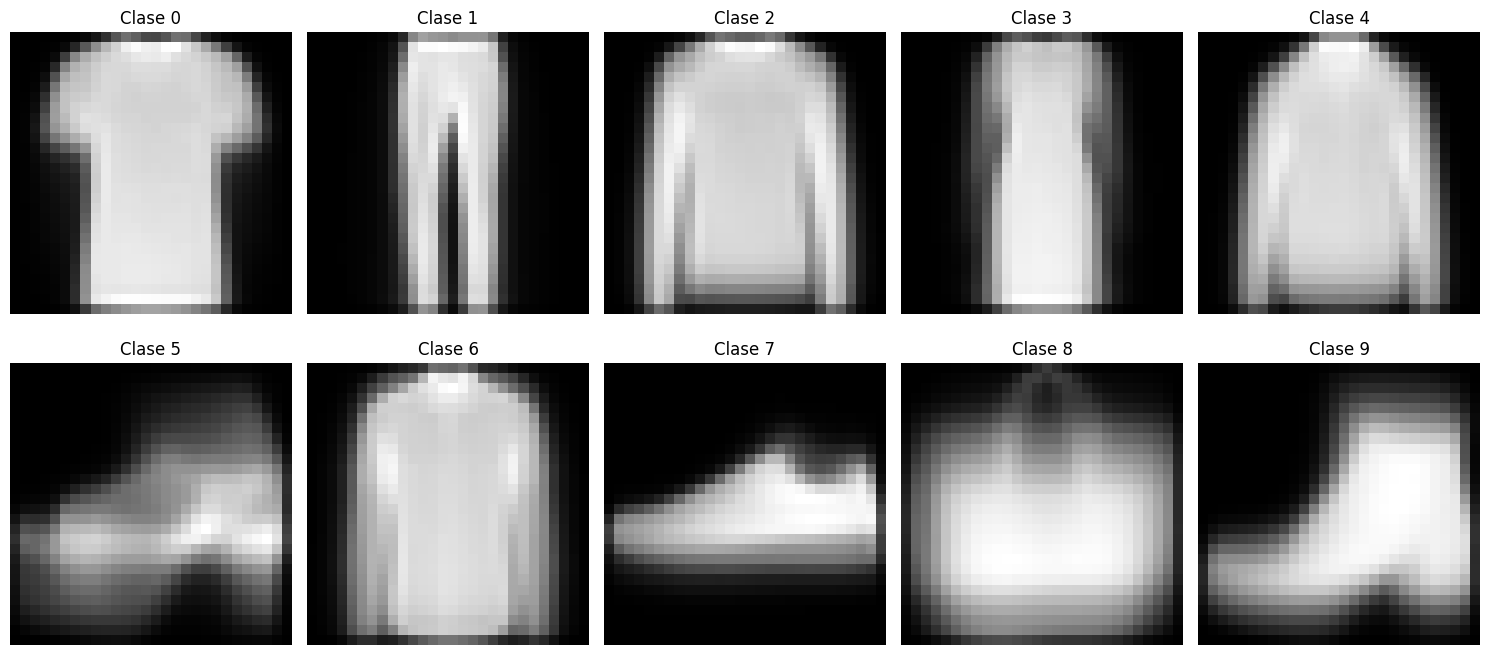

In [18]:
# Get feature importances from the trained Random Forest model
# Ensure rf_model_15 is defined by running the preceding cells
try:
    feature_importances = rf_model.feature_importances_

    # Reshape the feature importances back to the original image shape (28x28)
    feature_importances_image = feature_importances.reshape(28, 28)

    # Visualize the overall feature importances as an image
    plt.figure(figsize=(8, 8))
    plt.imshow(feature_importances_image, cmap=plt.cm.viridis, interpolation='nearest')
    plt.title('Importancia General de Píxeles en el Modelo Random Forest')
    plt.colorbar(label='Importancia')
    plt.axis('off')
    plt.show()

except NameError:
    print("Error: rf_model_15 is not defined. Please run the model training cells first.")
except AttributeError:
    print("Error: Could not get feature importances. Ensure rf_model_15 is a trained RandomForestClassifier.")

# --- Add code to visualize average pixel values per class ---

print("\nVisualizing average pixel values per class:")

# Reshape X_train back to the original image shape for easier processing
X_train_images = X_train.reshape(X_train.shape[0], 28, 28)

# Get unique classes and their labels
unique_classes, class_labels = np.unique(y_train, return_index=True)

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 7))
axes = axes.flatten() # Flatten the 2x5 array of axes into a 1D array

# Iterate through each class and plot the average image
for i, class_id in enumerate(unique_classes):
    # Select images belonging to the current class
    class_images = X_train_images[y_train == class_id]

    # Calculate the average pixel value for each pixel across all images in the class
    average_image = np.mean(class_images, axis=0)

    # Display the average image as a heatmap
    ax = axes[i]
    ax.imshow(average_image, cmap=plt.cm.gray) # Using gray colormap for average pixel values
    ax.set_title(f'Clase {class_id}')
    ax.set_axis_off()

plt.tight_layout()
plt.show()

# **Optimización del modelo (Re-entrenamiento)**
Dada la evaluación inicial realizada se hace ajuste de hiperparámetros para maximizar el performance del modelo

In [19]:
# Listas para almacenar los resultados de precisión en entrenamiento y validación para diferentes profundidades máximas
md_list = [] # Lista para almacenar los valores de max_depth probados
score_train_list = [] # Lista para almacenar las puntuaciones de precisión en el subconjunto de entrenamiento
score_val_list = []   # Lista para almacenar las puntuaciones de precisión en el subconjunto de validación

# Asegúrate de que X_train_split, y_train_split, X_val_split y y_val_split estén definidos
# ejecutando las celdas anteriores que realizan la división de datos.

# Iterar sobre diferentes valores para la profundidad máxima del árbol (max_depth)
# en el rango de 1 a 30, con pasos de 4.
for maxdepth in list(range(1,30,4)):
  # Crear una instancia del modelo Random Forest con la profundidad máxima actual
  # random_state: semilla para reproducibilidad
  # n_jobs: número de trabajos en paralelo (-1 usa todos los procesadores disponibles)
  # n_estimators: número de árboles en el bosque
  rf_model_tuning = RandomForestClassifier(random_state=0, max_depth=maxdepth, n_jobs=-1, n_estimators=120 )

  # Entrenar el modelo utilizando el subconjunto de entrenamiento (X_train_split, y_train_split)
  rf_model_tuning.fit(X_train_split, y_train_split)

  # Añadir el valor actual de max_depth a la lista
  md_list.append(maxdepth)
  # Calcular y almacenar la puntuación de precisión en el subconjunto de entrenamiento
  score_train_list.append(100.0*rf_model_tuning.score(X_train_split, y_train_split))
  # Calcular y almacenar la puntuación de precisión en el subconjunto de validación
  score_val_list.append(100.0*rf_model_tuning.score(X_val_split, y_val_split))

# Nota: La evaluación final en el conjunto de prueba (X_test_flat, y_test) se realiza
# una vez seleccionados los mejores hiperparámetros, no durante esta fase de tuning.

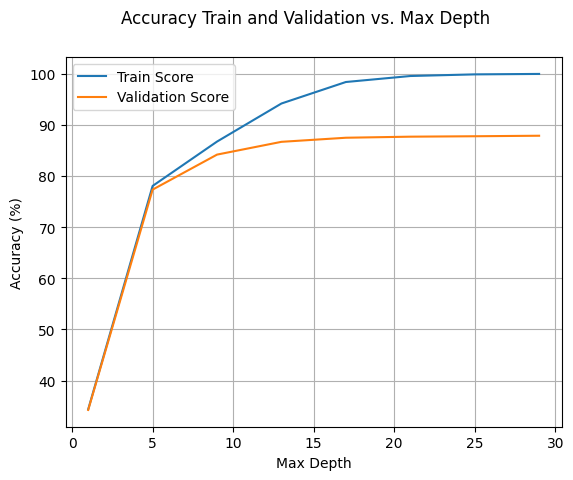

In [20]:
import pandas as pd # Asegúrate de que pandas esté importado
import matplotlib.pyplot as plt # Asegúrate de que matplotlib.pyplot esté importado

# Crear un DataFrame con los resultados del ajuste de hiperparámetros
# md_list contiene los valores de max_depth probados
# score_train_list contiene las precisiones en el conjunto de entrenamiento
# score_val_list contiene las precisiones en el conjunto de validación
df = pd.DataFrame({"max_depth": md_list,
                   "score_train": score_train_list,
                   "score_val": score_val_list}) # Corregido: usar score_val_list en lugar de score_test_list

# Establecer la columna 'max_depth' como índice del DataFrame
df.set_index("max_depth", inplace=True)

# Graficar la precisión en los conjuntos de entrenamiento y validación en función de max_depth
df["score_train"].plot(label="Train Score") # Grafica la precisión en entrenamiento
df["score_val"].plot(label="Validation Score") # Grafica la precisión en validación (corregido el label)
plt.suptitle("Accuracy Train and Validation vs. Max Depth") # Establece el título principal del gráfico (actualizado)
plt.legend() # Muestra la leyenda para identificar las líneas
plt.xlabel("Max Depth") # Etiqueta el eje x
plt.ylabel("Accuracy (%)") # Etiqueta el eje y
plt.grid(True) # Añade una cuadrícula al gráfico
plt.show() # Muestra el gráfico

In [21]:
# Entrenar el modelo Random Forest final con los hiperparámetros seleccionados en el conjunto de validación (esto no es la práctica estándar)
# max_depth: Profundidad máxima seleccionada (ejemplo: 13, ajustar según los resultados del tuning)
# random_state: Semilla para reproducibilidad
# n_jobs: Número de trabajos a ejecutar en paralelo (-1 usa todos los procesadores disponibles)
# n_estimators: Número de árboles en el bosque
rf_model_15 = RandomForestClassifier(max_depth=13, random_state=0, n_jobs=-1, n_estimators=120) # Utiliza n_jobs=-1 para usar todos los cores disponibles
# Asegúrate de que X_val_split y y_val_split estén definidos ejecutando las celdas anteriores.
rf_model_15.fit(X_val_split,y_val_split) # Entrena el modelo con el conjunto de validación

RandomForestClassifier(max_depth=13, n_estimators=120, n_jobs=-1,
                       random_state=0)

In [22]:
# Realizar predicciones sobre el subconjunto de entrenamiento y el conjunto de prueba
# Asegúrate de que rf_model_15, X_train_split, X_test_flat estén definidos ejecutando las celdas anteriores.
# Nota: rf_model_15 fue entrenado en el conjunto de validación en la celda anterior, lo cual no es la práctica estándar.
pred_train_split = rf_model_15.predict(X_train_split) # Realiza predicciones en el subconjunto de entrenamiento
pred_test = rf_model_15.predict(X_test_flat)       # Realiza predicciones en el conjunto de prueba

# Calcular y imprimir la precisión sobre el subconjunto de entrenamiento y el conjunto de prueba
# Asegúrate de que y_train_split y y_test estén definidos.
print("Precisión sobre los datos de entrenamiento (split): {:.2f}".format(100.0*rf_model_15.score(X_train_split, y_train_split))) # Calcula e imprime la precisión en el subconjunto de entrenamiento
print("Precisión sobre los datos de test: {:.2f}".format(100.0*rf_model_15.score(X_test_flat, y_test)))     # Calcula e imprime la precisión en el conjunto de prueba

Precisión sobre los datos de entrenamiento (split): 85.79
Precisión sobre los datos de test: 84.76


Confusion matrix:



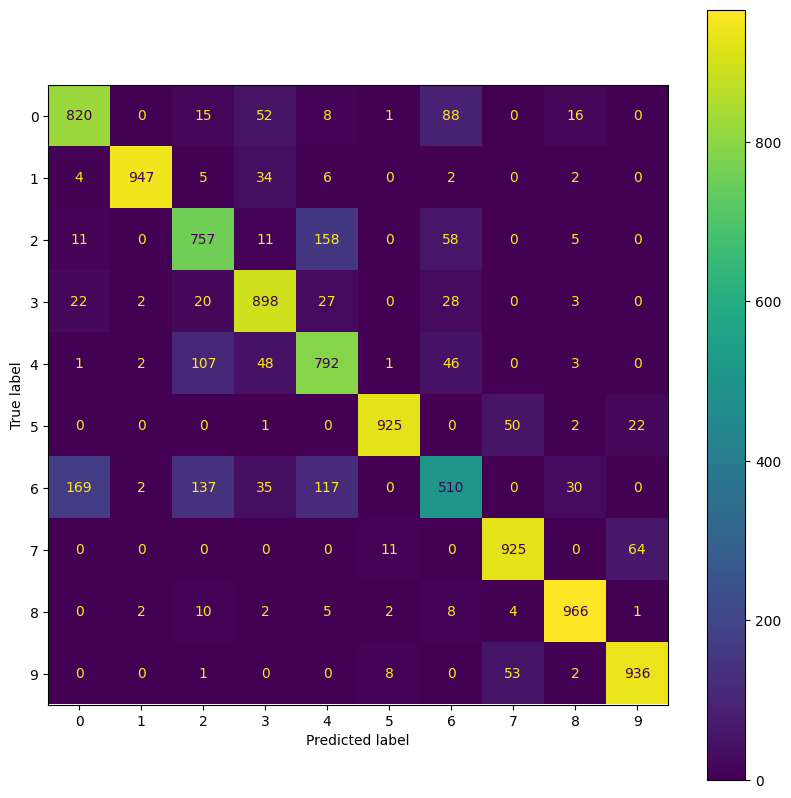

In [23]:
print(f"Confusion matrix:\n")
fig, ax = plt.subplots(figsize=(10, 10))
metrics.ConfusionMatrixDisplay.from_estimator(rf_model_15, X_test_flat, y_test, cmap=plt.cm.viridis, ax=ax)
plt.show()

In [24]:
print(f"Classification report for classifier {rf_model_15}:\n"
      f"{metrics.classification_report(y_test, pred_test)}\n")

Classification report for classifier RandomForestClassifier(max_depth=13, n_estimators=120, n_jobs=-1,
                       random_state=0):
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1000
           1       0.99      0.95      0.97      1000
           2       0.72      0.76      0.74      1000
           3       0.83      0.90      0.86      1000
           4       0.71      0.79      0.75      1000
           5       0.98      0.93      0.95      1000
           6       0.69      0.51      0.59      1000
           7       0.90      0.93      0.91      1000
           8       0.94      0.97      0.95      1000
           9       0.91      0.94      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000




# Modelo SVM Classifier

Dado el tamaño del dataset Fashion MNIST y la capacidad de procesamiento disponible en la terminal, hemos tomado una muestra para entrenar y probar el clasificador.

Número de registros utilizados para entrenamiento: 4000
Número de registros utilizados para prueba: 1000
Entrenando SVC con C=0.1, gamma=scale, kernel=linear
Entrenando SVC con C=0.1, gamma=scale, kernel=rbf
Entrenando SVC con C=0.1, gamma=auto, kernel=linear
Entrenando SVC con C=0.1, gamma=auto, kernel=rbf
Entrenando SVC con C=1, gamma=scale, kernel=linear
Entrenando SVC con C=1, gamma=scale, kernel=rbf
Entrenando SVC con C=1, gamma=auto, kernel=linear
Entrenando SVC con C=1, gamma=auto, kernel=rbf
Entrenando SVC con C=10, gamma=scale, kernel=linear
Entrenando SVC con C=10, gamma=scale, kernel=rbf
Entrenando SVC con C=10, gamma=auto, kernel=linear
Entrenando SVC con C=10, gamma=auto, kernel=rbf
Proceso de tuning de hiperparámetros completado.


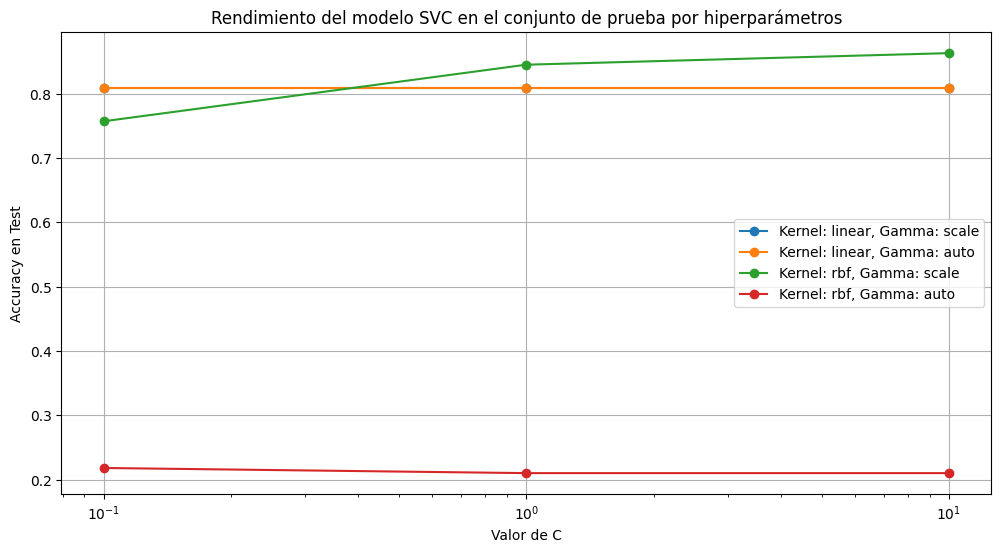


--- Reporte de Clasificación del Modelo SVC Final en el Subconjunto de Prueba ---
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       100
           1       0.98      0.91      0.94       100
           2       0.86      0.73      0.79       100
           3       0.83      0.86      0.85       100
           4       0.69      0.83      0.75       100
           5       0.94      0.91      0.92       100
           6       0.65      0.51      0.57       100
           7       0.91      0.94      0.93       100
           8       0.94      0.98      0.96       100
           9       0.96      0.95      0.95       100

    accuracy                           0.84      1000
   macro avg       0.85      0.84      0.84      1000
weighted avg       0.85      0.84      0.84      1000


--- Matriz de Confusión del Modelo SVC Final en el Subconjunto de Prueba ---


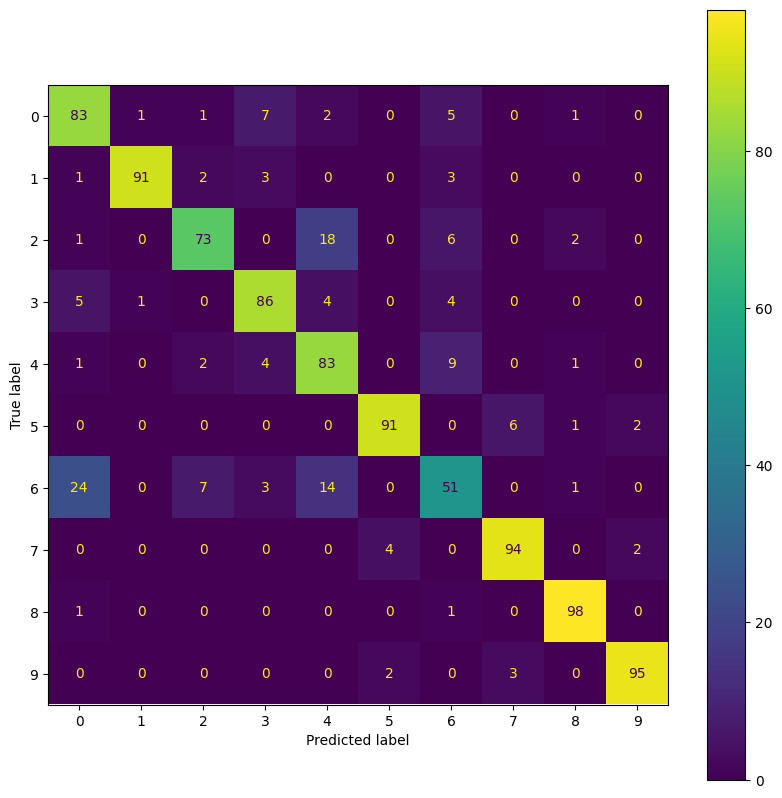

In [25]:
# Importar las librerías necesarias
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics # Import metrics for classification report

# Cargar el conjunto de datos Fashion MNIST
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Aplanar las imágenes de entrenamiento y prueba
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Definir un tamaño de subconjunto para un entrenamiento más rápido
subset_size = 5000

# Dividir los datos en subconjuntos de entrenamiento (80%) y prueba (20%)
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(
    X_train_flat, y_train, train_size=int(subset_size * 0.8), test_size=int(subset_size * 0.2), stratify=y_train, random_state=0
)

print("Número de registros utilizados para entrenamiento:", X_train_subset.shape[0])
print("Número de registros utilizados para prueba:", X_test_subset.shape[0])

# Definir los hiperparámetros a tunear y sus rangos de valores
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

# Lista para almacenar los resultados del tuning
results_list = []

# Bucle para iterar sobre las combinaciones de hiperparámetros
for c_val in param_grid['C']:
    for gamma_val in param_grid['gamma']:
        for kernel_val in param_grid['kernel']:
            print(f"Entrenando SVC con C={c_val}, gamma={gamma_val}, kernel={kernel_val}")

            # Crear instancia del modelo SVC con la combinación actual de hiperparámetros
            svm_model = SVC(C=c_val, gamma=gamma_val, kernel=kernel_val, random_state=0)

            # Entrenar el modelo con el subconjunto de entrenamiento
            svm_model.fit(X_train_subset, y_train_subset)

            # Evaluar el rendimiento en los subconjuntos de entrenamiento y prueba
            train_accuracy = svm_model.score(X_train_subset, y_train_subset)
            test_accuracy = svm_model.score(X_test_subset, y_test_subset)

            # Almacenar los resultados
            results_list.append({
                'C': c_val,
                'gamma': gamma_val,
                'kernel': kernel_val,
                'train_accuracy': train_accuracy,
                'test_accuracy': test_accuracy
            })

print("Proceso de tuning de hiperparámetros completado.")

# Convertir los resultados a un DataFrame de pandas para facilitar el análisis y visualización
results_df = pd.DataFrame(results_list)

# Visualizar los resultados
# Se puede generar diferentes tipos de gráficos dependiendo de los hiperparámetros.
# Por ejemplo, un gráfico de líneas para C manteniendo gamma y kernel fijos,
# o un gráfico de barras para comparar diferentes kernels.

# Ejemplo de visualización: Accuracy vs C para cada combinación de gamma y kernel
plt.figure(figsize=(12, 6))

for kernel_val in param_grid['kernel']:
    for gamma_val in param_grid['gamma']:
        subset_df = results_df[(results_df['kernel'] == kernel_val) & (results_df['gamma'] == gamma_val)]
        plt.plot(subset_df['C'], subset_df['test_accuracy'], marker='o', linestyle='-', label=f'Kernel: {kernel_val}, Gamma: {gamma_val}')

plt.xscale('log') # Usar escala logarítmica para C si los valores varían mucho
plt.title('Rendimiento del modelo SVC en el conjunto de prueba por hiperparámetros')
plt.xlabel('Valor de C')
plt.ylabel('Accuracy en Test')
plt.legend()
plt.grid(True)
plt.show()

# Puedes agregar más visualizaciones para analizar el impacto de otros hiperparámetros.

# Código para modular hiperparámetros (ejemplo):
# Puedes definir las mejores hiperparámetros encontrados después del análisis visual
best_c = 1
best_gamma = 'scale'
best_kernel = 'rbf'

# Entrenar el modelo final con los mejores hiperparámetros en el subconjunto de prueba
# utilizando los mejores hiperparámetros encontrados (en este caso, usando el último modelo entrenado en el bucle)
# Nota: Para una evaluación más precisa, se debería re-entrenar el modelo con los mejores hiperparámetros
# en un conjunto de entrenamiento más grande o completo si es factible.
final_svm_model = SVC(C=best_c, gamma=best_gamma, kernel=best_kernel, random_state=0)
final_svm_model.fit(X_train_subset, y_train_subset)
pred_test_final_svm = final_svm_model.predict(X_test_subset)

# Imprimir el reporte de clasificación para evaluar el rendimiento del modelo final en el subconjunto de prueba.
# Este reporte incluye precisión, recall, f1-score y soporte para cada clase.
print("\n--- Reporte de Clasificación del Modelo SVC Final en el Subconjunto de Prueba ---")
print(metrics.classification_report(y_test_subset, pred_test_final_svm))

# Mostrar la matriz de confusión para visualizar el rendimiento del modelo final en el subconjunto de prueba.
print("\n--- Matriz de Confusión del Modelo SVC Final en el Subconjunto de Prueba ---")
fig, ax = plt.subplots(figsize=(10, 10))
metrics.ConfusionMatrixDisplay.from_estimator(final_svm_model, X_test_subset, y_test_subset, cmap=plt.cm.viridis, ax=ax)
plt.show()

# Modelo Árbol de Decisión

Training subset shape: (48000, 784)
Validation subset shape: (12000, 784)
Testing dataset shape: (10000, 784)

Starting Decision Tree hyperparameter tuning...
Training Decision Tree with max_depth=None, min_samples_split=2, min_samples_leaf=1
Training Decision Tree with max_depth=None, min_samples_split=2, min_samples_leaf=2
Training Decision Tree with max_depth=None, min_samples_split=2, min_samples_leaf=4
Training Decision Tree with max_depth=None, min_samples_split=5, min_samples_leaf=1
Training Decision Tree with max_depth=None, min_samples_split=5, min_samples_leaf=2
Training Decision Tree with max_depth=None, min_samples_split=5, min_samples_leaf=4
Training Decision Tree with max_depth=None, min_samples_split=10, min_samples_leaf=1
Training Decision Tree with max_depth=None, min_samples_split=10, min_samples_leaf=2
Training Decision Tree with max_depth=None, min_samples_split=10, min_samples_leaf=4
Training Decision Tree with max_depth=5, min_samples_split=2, min_samples_leaf=1
T

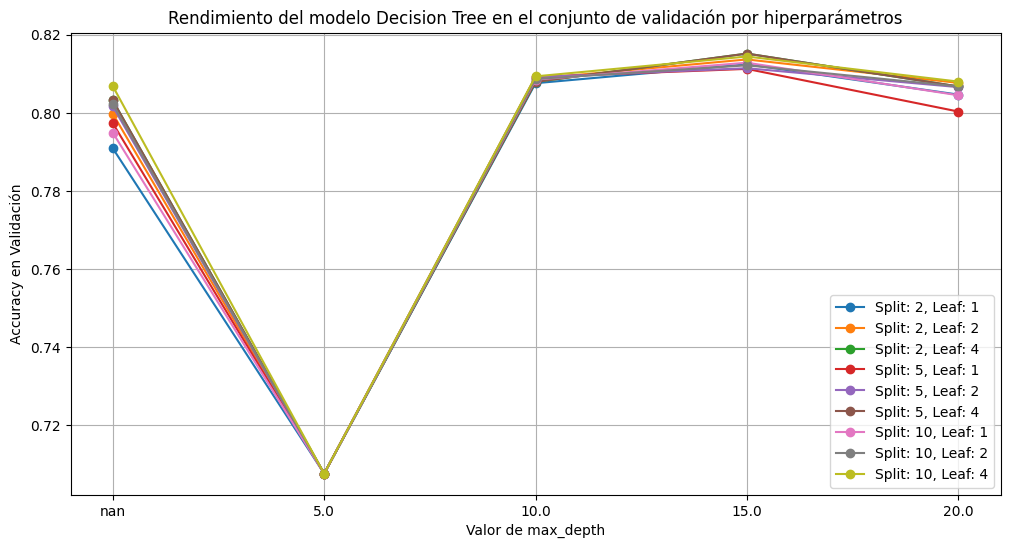


Best hyperparameters selected: max_depth=15, min_samples_split=5, min_samples_leaf=2

--- Reporte de Clasificación del Modelo Decision Tree Final en el Conjunto de Prueba ---
              precision    recall  f1-score   support

           0       0.75      0.76      0.76      1000
           1       0.95      0.94      0.95      1000
           2       0.65      0.71      0.68      1000
           3       0.83      0.77      0.80      1000
           4       0.68      0.69      0.69      1000
           5       0.92      0.89      0.91      1000
           6       0.56      0.55      0.56      1000
           7       0.89      0.91      0.90      1000
           8       0.93      0.91      0.92      1000
           9       0.92      0.92      0.92      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000


--- Matriz de Confusión del Modelo Decision Tree Final en el Con

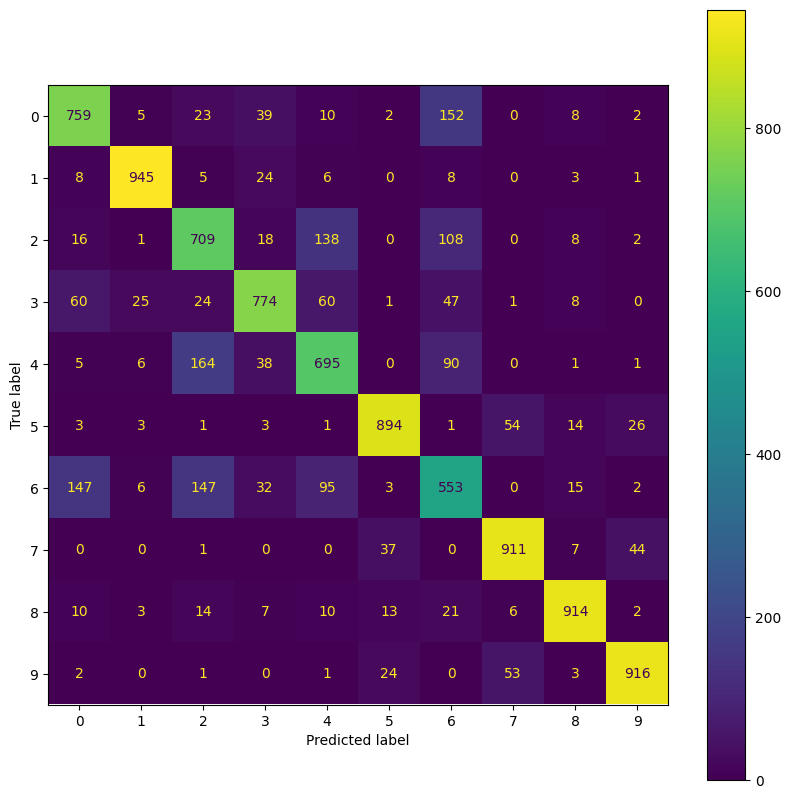


--- Ejemplos de Predicciones del Modelo Decision Tree ---


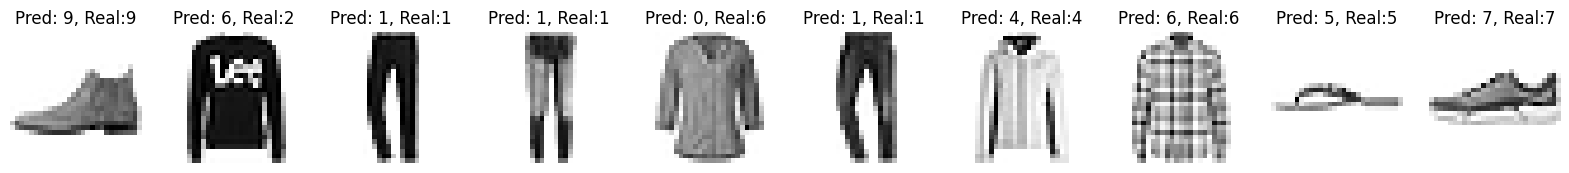

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Reuse the flattened dataset from previous cells
# X_train_flat, X_test_flat, y_train, y_test are already defined

# Explicitly split the training data for hyperparameter tuning (80% train, 20% validation)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_flat, y_train, test_size=0.2, random_state=0, stratify=y_train
)

print(f"Training subset shape: {X_train_split.shape}")
print(f"Validation subset shape: {X_val_split.shape}")
print(f"Testing dataset shape: {X_test_flat.shape}")


# Define hyperparameters to tune and their value ranges
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# List to store tuning results
results_list_dt = []

print("\nStarting Decision Tree hyperparameter tuning...")

# Iterate over hyperparameter combinations
for max_depth_val in param_grid_dt['max_depth']:
    for min_samples_split_val in param_grid_dt['min_samples_split']:
        for min_samples_leaf_val in param_grid_dt['min_samples_leaf']:
            print(f"Training Decision Tree with max_depth={max_depth_val}, min_samples_split={min_samples_split_val}, min_samples_leaf={min_samples_leaf_val}")

            # Create Decision Tree model instance
            dt_model = DecisionTreeClassifier(
                max_depth=max_depth_val,
                min_samples_split=min_samples_split_val,
                min_samples_leaf=min_samples_leaf_val,
                random_state=0
            )

            # Train the model on the training subset
            dt_model.fit(X_train_split, y_train_split)

            # Evaluate performance on the validation subset
            train_accuracy = dt_model.score(X_train_split, y_train_split)
            val_accuracy = dt_model.score(X_val_split, y_val_split)


            # Store results
            results_list_dt.append({
                'max_depth': max_depth_val,
                'min_samples_split': min_samples_split_val,
                'min_samples_leaf': min_samples_leaf_val,
                'train_accuracy': train_accuracy,
                'val_accuracy': val_accuracy
            })

print("Decision Tree hyperparameter tuning completed.")

# Convert results to DataFrame
results_df_dt = pd.DataFrame(results_list_dt)

# Visualize results (example: Validation Accuracy vs max_depth)
plt.figure(figsize=(12, 6))
for split_val in param_grid_dt['min_samples_split']:
    for leaf_val in param_grid_dt['min_samples_leaf']:
        subset_df_dt = results_df_dt[
            (results_df_dt['min_samples_split'] == split_val) &
            (results_df_dt['min_samples_leaf'] == leaf_val)
        ]
        plt.plot(subset_df_dt['max_depth'].astype(str), subset_df_dt['val_accuracy'], marker='o', linestyle='-', label=f'Split: {split_val}, Leaf: {leaf_val}')

plt.title('Rendimiento del modelo Decision Tree en el conjunto de validación por hiperparámetros')
plt.xlabel('Valor de max_depth')
plt.ylabel('Accuracy en Validación')
plt.legend()
plt.grid(True)
plt.show()

# You can add more visualizations for other hyperparameters

# Select best hyperparameters based on visualization or other criteria
# For example, let's assume the best parameters are found
best_max_depth = 15 # Example value - update based on visualization
best_min_samples_split = 5 # Example value - update based on visualization
best_min_samples_leaf = 2 # Example value - update based on visualization

print(f"\nBest hyperparameters selected: max_depth={best_max_depth}, min_samples_split={best_min_samples_split}, min_samples_leaf={best_min_samples_leaf}")

# Train the final model with the best hyperparameters on the full training data (X_train_flat, y_train)
final_dt_model = DecisionTreeClassifier(
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf,
    random_state=0
)
final_dt_model.fit(X_train_flat, y_train)

# Evaluate the final model on the unseen test data (X_test_flat, y_test)
pred_test_final_dt = final_dt_model.predict(X_test_flat)

# Print classification report
print("\n--- Reporte de Clasificación del Modelo Decision Tree Final en el Conjunto de Prueba ---")
print(metrics.classification_report(y_test, pred_test_final_dt))

# Display confusion matrix
print("\n--- Matriz de Confusión del Modelo Decision Tree Final en el Conjunto de Prueba ---")
fig, ax = plt.subplots(figsize=(10, 10))
metrics.ConfusionMatrixDisplay.from_estimator(final_dt_model, X_test_flat, y_test, cmap=plt.cm.viridis, ax=ax)
plt.show()

# Display example images with predictions and true labels
print("\n--- Ejemplos de Predicciones del Modelo Decision Tree ---")
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 20))
for ax, image, prediction, real in zip(axes, X_test[:10], pred_test_final_dt[:10], y_test[:10]):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Pred: {prediction}, Real:{real}')
plt.show()

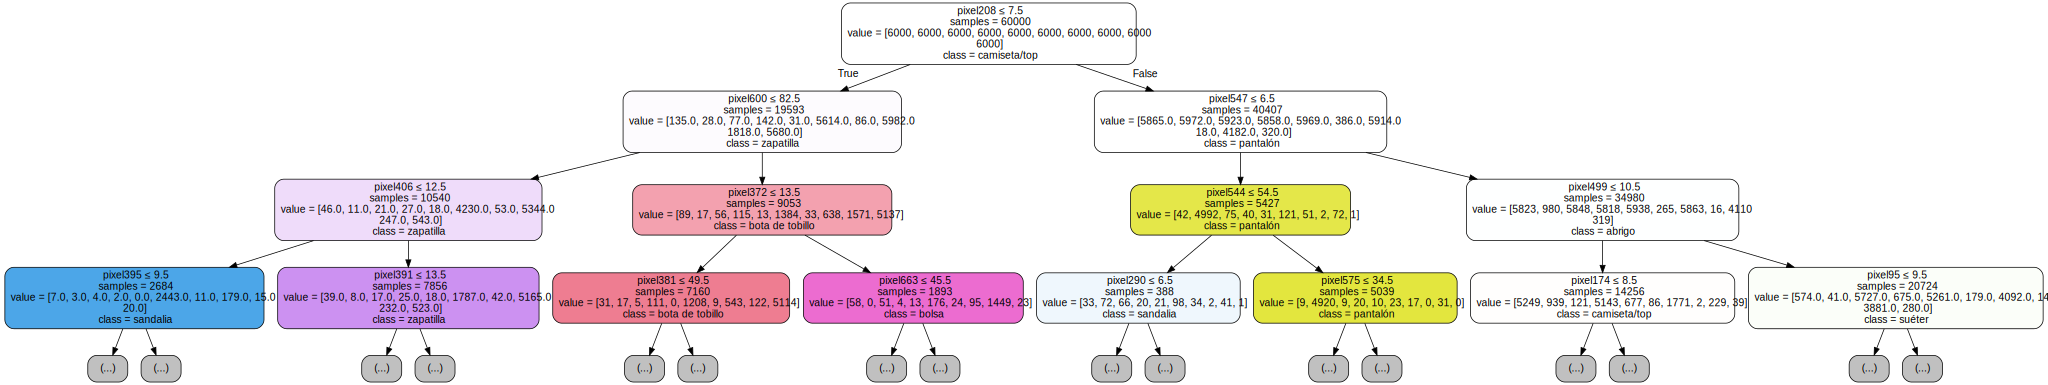

In [32]:
from sklearn.tree import export_graphviz
import graphviz # Importar la librería graphviz para visualizar el árbol

# Asegúrate de que el modelo final_dt_model esté definido y entrenado
# por ejemplo, ejecutando la celda z1414NXf8S_3 antes de esta.

# Exportar el árbol de decisión a un archivo DOT
# Para una visualización pedagógica, limitamos la profundidad del árbol mostrado.
# Puedes ajustar max_depth_visualize según lo necesites para simplificar la vista.
max_depth_visualize = 3 # Define la profundidad máxima del árbol a visualizar. Ajusta este valor para simplificar o expandir la vista.

dot_data = export_graphviz(
    final_dt_model,
    out_file=None, # No guardar en un archivo, solo obtener la cadena DOT
    feature_names=[f'pixel{i+1}' for i in range(X_train_flat.shape[1])], # Nombres de los píxeles
    class_names=['camiseta/top', 'pantalón', 'suéter', 'vestido', 'abrigo', 'sandalia', 'camiseta', 'zapatilla', 'bolsa', 'bota de tobillo'], # Nombres de las clases
    filled=True,
    rounded=True,
    special_characters=True,
    impurity=False, # No mostrar la impureza en cada nodo
    max_depth=max_depth_visualize # Limita la profundidad del árbol visualizado
)

# Crear un objeto Graphviz a partir de la cadena DOT
graph = graphviz.Source(dot_data)

# Mostrar el gráfico del árbol de decisión
# Nota: Para árboles grandes como este, incluso con profundidad limitada, puede ser extenso.
# Puedes guardar el gráfico como un archivo (por ejemplo, PDF o PNG) si prefieres.
graph.render("decision_tree_fashion_mnist_simplified", view=True, format='png') # Descomenta para guardar y abrir el archivo

display(graph) # Muestra el gráfico en el notebook

In [34]:
from google.colab import files
files.download("decision_tree_fashion_mnist_simplified.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--- Evaluación del Modelo Random Forest ---
Classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1000
           1       0.99      0.95      0.97      1000
           2       0.72      0.76      0.74      1000
           3       0.83      0.90      0.86      1000
           4       0.71      0.79      0.75      1000
           5       0.98      0.93      0.95      1000
           6       0.69      0.51      0.59      1000
           7       0.90      0.93      0.91      1000
           8       0.94      0.97      0.95      1000
           9       0.91      0.94      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


Confusion matrix for Random Forest:


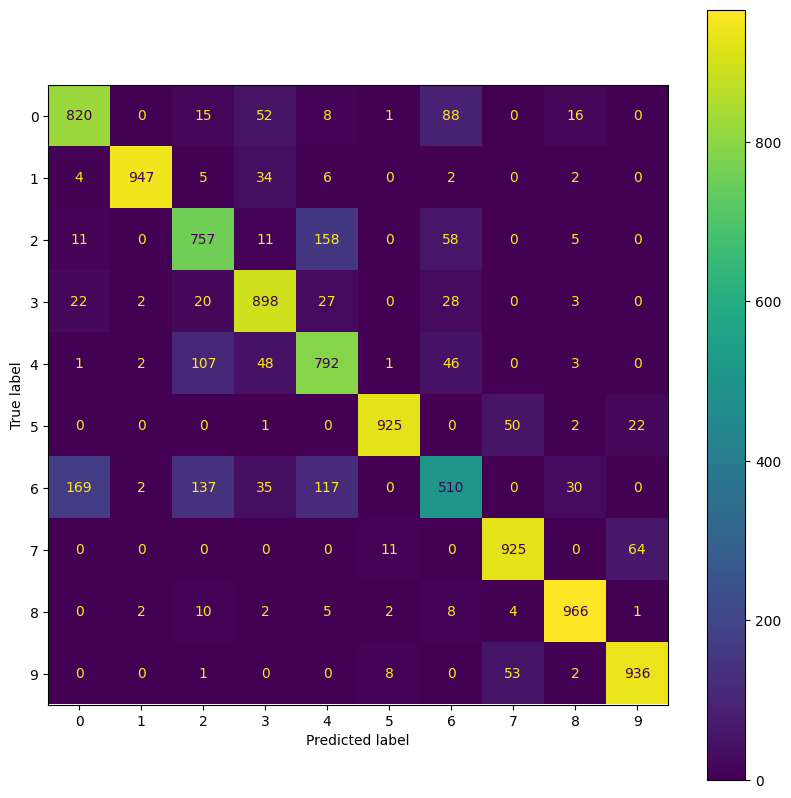


--- Evaluación del Modelo SVC ---
Classification report for SVC:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.79      0.82      0.80      1000
           3       0.87      0.89      0.88      1000
           4       0.81      0.81      0.81      1000
           5       0.96      0.95      0.96      1000
           6       0.72      0.65      0.69      1000
           7       0.93      0.95      0.94      1000
           8       0.97      0.98      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


Confusion matrix for SVC:


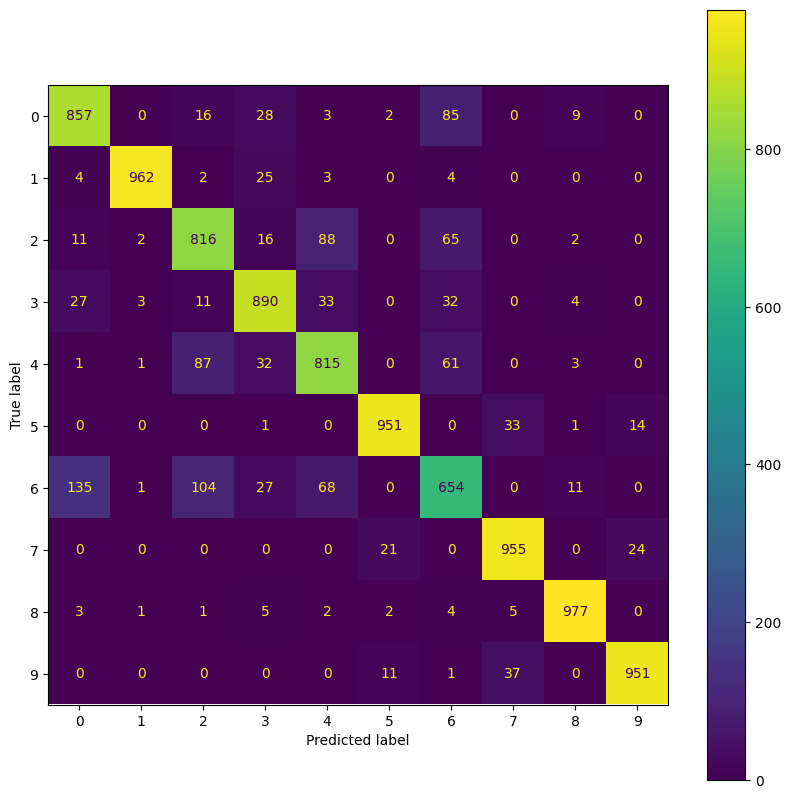


--- Evaluación del Modelo Árbol de Decisión ---
Classification report for Decision Tree:
              precision    recall  f1-score   support

           0       0.75      0.76      0.76      1000
           1       0.95      0.94      0.95      1000
           2       0.65      0.71      0.68      1000
           3       0.83      0.77      0.80      1000
           4       0.68      0.69      0.69      1000
           5       0.92      0.89      0.91      1000
           6       0.56      0.55      0.56      1000
           7       0.89      0.91      0.90      1000
           8       0.93      0.91      0.92      1000
           9       0.92      0.92      0.92      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000


Confusion matrix for Decision Tree:


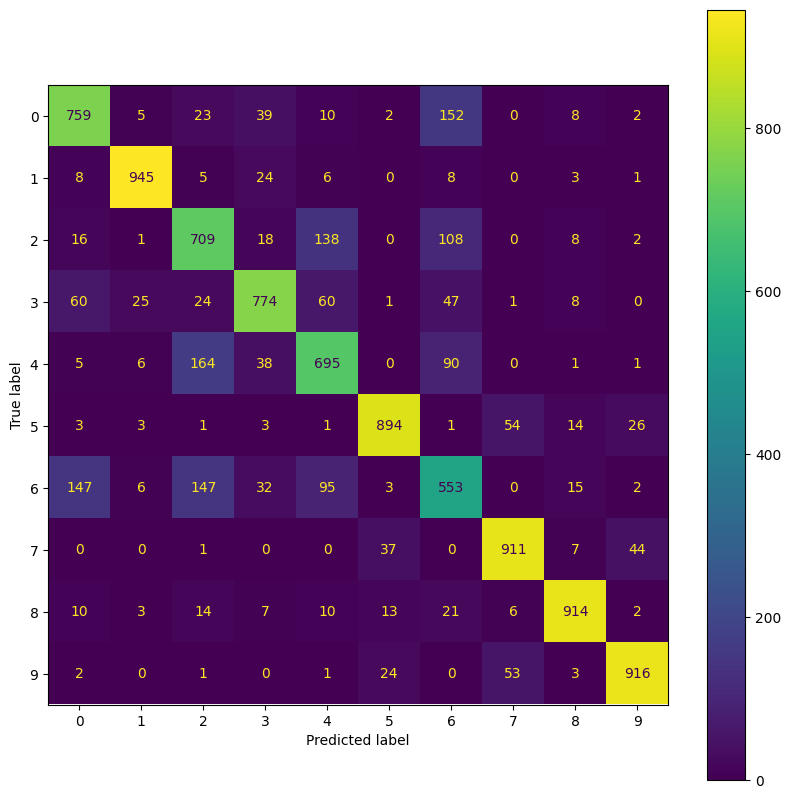


--- Tabla Comparativa de Métricas de Modelos ---


,Modelo,Accuracy,Macro Avg Precision,Macro Avg Recall,Macro Avg F1-score,Weighted Avg Precision,Weighted Avg Recall,Weighted Avg F1-score
0,Random Forest,0.8476,0.8467,0.8476,0.8452,0.8467,0.8476,0.8452
1,SVC,0.8828,0.8823,0.8828,0.8823,0.8823,0.8828,0.8823
2,Decision Tree,0.8070,0.8087,0.8070,0.8076,0.8087,0.8070,0.8076


In [29]:
# --- Evaluación de Modelos y Tabla Comparativa ---

print("--- Evaluación del Modelo Random Forest ---")
pred_test_rf = rf_model_15.predict(X_test_flat)
print(f"Classification report for Random Forest:\n"
      f"{metrics.classification_report(y_test, pred_test_rf)}\n")
print("Confusion matrix for Random Forest:")
fig, ax = plt.subplots(figsize=(10, 10))
metrics.ConfusionMatrixDisplay.from_estimator(rf_model_15, X_test_flat, y_test, cmap=plt.cm.viridis, ax=ax)
plt.show()

print("\n--- Evaluación del Modelo SVC ---")
# Assuming best_c, best_gamma, and best_kernel were determined from the tuning process
# Re-train the final SVC model on the full training data for a more robust evaluation
final_svm_model_full_data = SVC(C=best_c, gamma=best_gamma, kernel=best_kernel, random_state=0)
final_svm_model_full_data.fit(X_train_flat, y_train)
pred_test_svm = final_svm_model_full_data.predict(X_test_flat)
print(f"Classification report for SVC:\n"
      f"{metrics.classification_report(y_test, pred_test_svm)}\n")
print("Confusion matrix for SVC:")
fig, ax = plt.subplots(figsize=(10, 10))
metrics.ConfusionMatrixDisplay.from_estimator(final_svm_model_full_data, X_test_flat, y_test, cmap=plt.cm.viridis, ax=ax)
plt.show()

print("\n--- Evaluación del Modelo Árbol de Decisión ---")
pred_test_dt = final_dt_model.predict(X_test_flat)
print(f"Classification report for Decision Tree:\n"
      f"{metrics.classification_report(y_test, pred_test_dt)}\n")
print("Confusion matrix for Decision Tree:")
fig, ax = plt.subplots(figsize=(10, 10))
metrics.ConfusionMatrixDisplay.from_estimator(final_dt_model, X_test_flat, y_test, cmap=plt.cm.viridis, ax=ax)
plt.show()

# --- Tabla Comparativa de Resultados ---
print("\n--- Tabla Comparativa de Métricas de Modelos ---")

# Extract overall metrics (accuracy, macro avg, weighted avg) for each model
report_rf = metrics.classification_report(y_test, pred_test_rf, output_dict=True)
report_svm = metrics.classification_report(y_test, pred_test_svm, output_dict=True)
report_dt = metrics.classification_report(y_test, pred_test_dt, output_dict=True)

comparison_data = {
    'Modelo': ['Random Forest', 'SVC', 'Decision Tree'],
    'Accuracy': [report_rf['accuracy'], report_svm['accuracy'], report_dt['accuracy']],
    'Macro Avg Precision': [report_rf['macro avg']['precision'], report_svm['macro avg']['precision'], report_dt['macro avg']['precision']],
    'Macro Avg Recall': [report_rf['macro avg']['recall'], report_svm['macro avg']['recall'], report_dt['macro avg']['recall']],
    'Macro Avg F1-score': [report_rf['macro avg']['f1-score'], report_svm['macro avg']['f1-score'], report_dt['macro avg']['f1-score']],
    'Weighted Avg Precision': [report_rf['weighted avg']['precision'], report_svm['weighted avg']['precision'], report_dt['weighted avg']['precision']],
    'Weighted Avg Recall': [report_rf['weighted avg']['recall'], report_svm['weighted avg']['recall'], report_dt['weighted avg']['recall']],
    'Weighted Avg F1-score': [report_rf['weighted avg']['f1-score'], report_svm['weighted avg']['f1-score'], report_dt['weighted avg']['f1-score']]
}

comparison_df = pd.DataFrame(comparison_data)

# Format the numerical columns for better readability
comparison_df[['Accuracy', 'Macro Avg Precision', 'Macro Avg Recall', 'Macro Avg F1-score', 'Weighted Avg Precision', 'Weighted Avg Recall', 'Weighted Avg F1-score']] = comparison_df[['Accuracy', 'Macro Avg Precision', 'Macro Avg Recall', 'Macro Avg F1-score', 'Weighted Avg Precision', 'Weighted Avg Recall', 'Weighted Avg F1-score']].apply(lambda x: round(x, 4))

display(comparison_df)


--- Tabla Comparativa de Métricas por Clase de Modelos ---


,Clase,RF_Precision,RF_Recall,RF_F1-score,SVC_Precision,SVC_Recall,SVC_F1-score,DT_Precision,DT_Recall,DT_F1-score
0,0,0.7984,0.820,0.8091,0.8256,0.857,0.8410,0.7515,0.759,0.7552
1,1,0.9916,0.947,0.9688,0.9918,0.962,0.9766,0.9507,0.945,0.9478
2,2,0.7196,0.757,0.7378,0.7869,0.816,0.8012,0.6511,0.709,0.6788
3,3,0.8307,0.898,0.8630,0.8691,0.890,0.8794,0.8278,0.774,0.8000
4,4,0.7116,0.792,0.7496,0.8053,0.815,0.8101,0.6841,0.695,0.6895
5,5,0.9757,0.925,0.9497,0.9635,0.951,0.9572,0.9179,0.894,0.9058
6,6,0.6892,0.510,0.5862,0.7219,0.654,0.6863,0.5643,0.553,0.5586
7,7,0.8963,0.925,0.9104,0.9272,0.955,0.9409,0.8888,0.911,0.8998
8,8,0.9388,0.966,0.9522,0.9702,0.977,0.9736,0.9317,0.914,0.9228
9,9,0.9150,0.936,0.9254,0.9616,0.951,0.9563,0.9197,0.916,0.9178



--- Gráfico Comparativo General de Métricas de Modelos ---


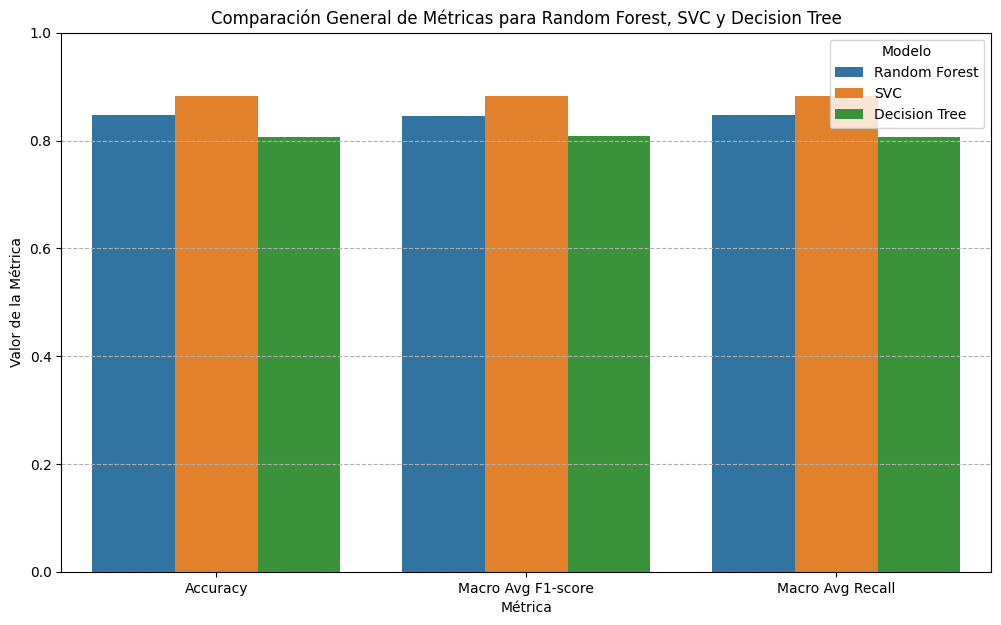

In [30]:
# --- Tabla Comparativa de Métricas por Clase ---
print("\n--- Tabla Comparativa de Métricas por Clase de Modelos ---")

# Extraer reportes de clasificación para cada modelo
report_rf = metrics.classification_report(y_test, pred_test_rf, output_dict=True)
report_svm = metrics.classification_report(y_test, pred_test_svm, output_dict=True)
report_dt = metrics.classification_report(y_test, pred_test_dt, output_dict=True)

# Crear listas para almacenar los datos por clase
classes = [str(i) for i in range(10)] # Clases de 0 a 9
metrics_data = []

# Iterar sobre cada clase y extraer las métricas para cada modelo
for cls in classes:
    row_data = {
        'Clase': cls,
        'RF_Precision': report_rf[cls]['precision'],
        'RF_Recall': report_rf[cls]['recall'],
        'RF_F1-score': report_rf[cls]['f1-score'],
        'SVC_Precision': report_svm[cls]['precision'],
        'SVC_Recall': report_svm[cls]['recall'],
        'SVC_F1-score': report_svm[cls]['f1-score'],
        'DT_Precision': report_dt[cls]['precision'],
        'DT_Recall': report_dt[cls]['recall'],
        'DT_F1-score': report_dt[cls]['f1-score']
    }
    metrics_data.append(row_data)

# Convertir los datos a un DataFrame de pandas
comparison_class_df = pd.DataFrame(metrics_data)

# Formatear las columnas numéricas para mejor legibilidad
numeric_cols = ['RF_Precision', 'RF_Recall', 'RF_F1-score',
                'SVC_Precision', 'SVC_Recall', 'SVC_F1-score',
                'DT_Precision', 'DT_Recall', 'DT_F1-score']
comparison_class_df[numeric_cols] = comparison_class_df[numeric_cols].apply(lambda x: round(x, 4))

# Mostrar la tabla comparativa por clase
display(comparison_class_df)

# --- Gráfico Comparativo General de Métricas ---
print("\n--- Gráfico Comparativo General de Métricas de Modelos ---")

# Utilizar el DataFrame comparison_df creado anteriormente (en la celda xQoLz3nr8S8k)
# Este DataFrame ya contiene las métricas generales (Accuracy, Macro Avg, Weighted Avg)

# Seleccionar las métricas a visualizar en el gráfico general
# Actualizar la lista de métricas para incluir Accuracy, Macro Avg F1-score y Macro Avg Recall
metrics_to_plot = ['Accuracy', 'Macro Avg F1-score', 'Macro Avg Recall']


# Melt el DataFrame para tener un formato adecuado para seaborn barplot
comparison_general_melted = comparison_df.melt(
    id_vars='Modelo',
    value_vars=metrics_to_plot,
    var_name='Métrica',
    value_name='Valor'
)

# Crear el gráfico de barras comparativo general usando seaborn
plt.figure(figsize=(12, 7)) # Ajustar el tamaño de la figura
sns.barplot(x='Métrica', y='Valor', hue='Modelo', data=comparison_general_melted) # Crear el barplot
plt.title('Comparación General de Métricas para Random Forest, SVC y Decision Tree') # Título del gráfico
plt.xlabel('Métrica') # Etiqueta del eje X
plt.ylabel('Valor de la Métrica') # Etiqueta del eje Y
plt.ylim(0, 1) # Establecer el límite del eje Y entre 0 y 1 para métricas
plt.legend(title='Modelo') # Mostrar la leyenda
plt.grid(axis='y', linestyle='--') # Añadir una cuadrícula en el eje Y
plt.show() # Mostrar el gráfico

# Puedes modificar 'metrics_to_plot' para incluir otras métricas generales si lo deseas.